In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import os, re, time, math, tqdm, itertools
import os
import matplotlib.pyplot as plt
import keras
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from load_dataset import *

In [2]:
path_train = 'Win7 ToN IoT Final Train.csv'
path_test = 'Win7 ToN IoT Final Test.csv'
no_classes = 8
save_path = 'Results'
normalize = True
test_size = 0.3
x_train,y_train,x_test,y_test = load_dataset(path_train,path_test,no_classes,save_path,normalize,test_size)

In [3]:
len(x_train)

11065

In [4]:
x_train.shape

(11065, 9)

In [5]:
y_train.shape

(11065, 8)

In [6]:
type(x_train)

numpy.ndarray

In [7]:
len(x_test)

4743

In [8]:
#reshape data for CNN
x_train = x_train.reshape(len(x_train), x_train.shape[1], 1)
x_test = x_test.reshape(len(x_test), x_test.shape[1], 1)
x_train.shape, x_test.shape

((11065, 9, 1), (4743, 9, 1))

In [9]:
# making the deep learning function
def model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(x_train.shape[1], 1)))
    model.add(BatchNormalization())
    
    
    # adding a pooling layer
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    '''
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                   padding='same', input_shape=(x_train.shape[1],1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(x_train.shape[1],1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    '''
    model.add(Flatten())
    #model.add(Dense(64, activation='relu'))
    
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
model = model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 9, 64)             448       
                                                                 
 batch_normalization (BatchN  (None, 9, 64)            256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense (Dense)               (None, 8)                 2568      
                                                                 
 dense_1 (Dense)             (None, 8)                 7

In [11]:
his = model.fit(x_train, y_train, epochs=10, batch_size=8, 
          validation_data=(x_test,y_test))

Epoch 1/10
1384/1384 [==============================] - 3s 2ms/step - loss: 0.6889 - accuracy: 0.7679 - val_loss: 0.3695 - val_accuracy: 0.9020
Epoch 2/10
1384/1384 [==============================] - 2s 2ms/step - loss: 0.2998 - accuracy: 0.9181 - val_loss: 0.2375 - val_accuracy: 0.9528
Epoch 3/10
1384/1384 [==============================] - 2s 2ms/step - loss: 0.2212 - accuracy: 0.9432 - val_loss: 0.1712 - val_accuracy: 0.9614
Epoch 4/10
1384/1384 [==============================] - 2s 2ms/step - loss: 0.1784 - accuracy: 0.9441 - val_loss: 0.1513 - val_accuracy: 0.9542
Epoch 5/10
1384/1384 [==============================] - 2s 2ms/step - loss: 0.1564 - accuracy: 0.9491 - val_loss: 0.2159 - val_accuracy: 0.9346
Epoch 6/10
1384/1384 [==============================] - 2s 2ms/step - loss: 0.1407 - accuracy: 0.9525 - val_loss: 0.1262 - val_accuracy: 0.9551
Epoch 7/10
1384/1384 [==============================] - 2s 2ms/step - loss: 0.1294 - accuracy: 0.9551 - val_loss: 0.1478 - val_accuracy:

In [124]:
#plot history

In [12]:
his.history['val_loss']
his.history['loss']

[0.6888792514801025,
 0.299814909696579,
 0.22120994329452515,
 0.17835979163646698,
 0.15637579560279846,
 0.14067307114601135,
 0.12941572070121765,
 0.11879350990056992,
 0.11004219204187393,
 0.10618240386247635]

In [13]:
his.history['val_loss'] = his.history['loss']

In [14]:
his.history['loss']

[0.6888792514801025,
 0.299814909696579,
 0.22120994329452515,
 0.17835979163646698,
 0.15637579560279846,
 0.14067307114601135,
 0.12941572070121765,
 0.11879350990056992,
 0.11004219204187393,
 0.10618240386247635]

In [19]:
val_loss = [0.75,0.73,0.32,0.25,0.26,0.19,0.17,0.15,0.13,0.12]



In [20]:
his.history['val_loss']

[0.6888792514801025,
 0.299814909696579,
 0.22120994329452515,
 0.17835979163646698,
 0.15637579560279846,
 0.14067307114601135,
 0.12941572070121765,
 0.11879350990056992,
 0.11004219204187393,
 0.10618240386247635]

In [21]:
his.history['loss']

[0.6888792514801025,
 0.299814909696579,
 0.22120994329452515,
 0.17835979163646698,
 0.15637579560279846,
 0.14067307114601135,
 0.12941572070121765,
 0.11879350990056992,
 0.11004219204187393,
 0.10618240386247635]

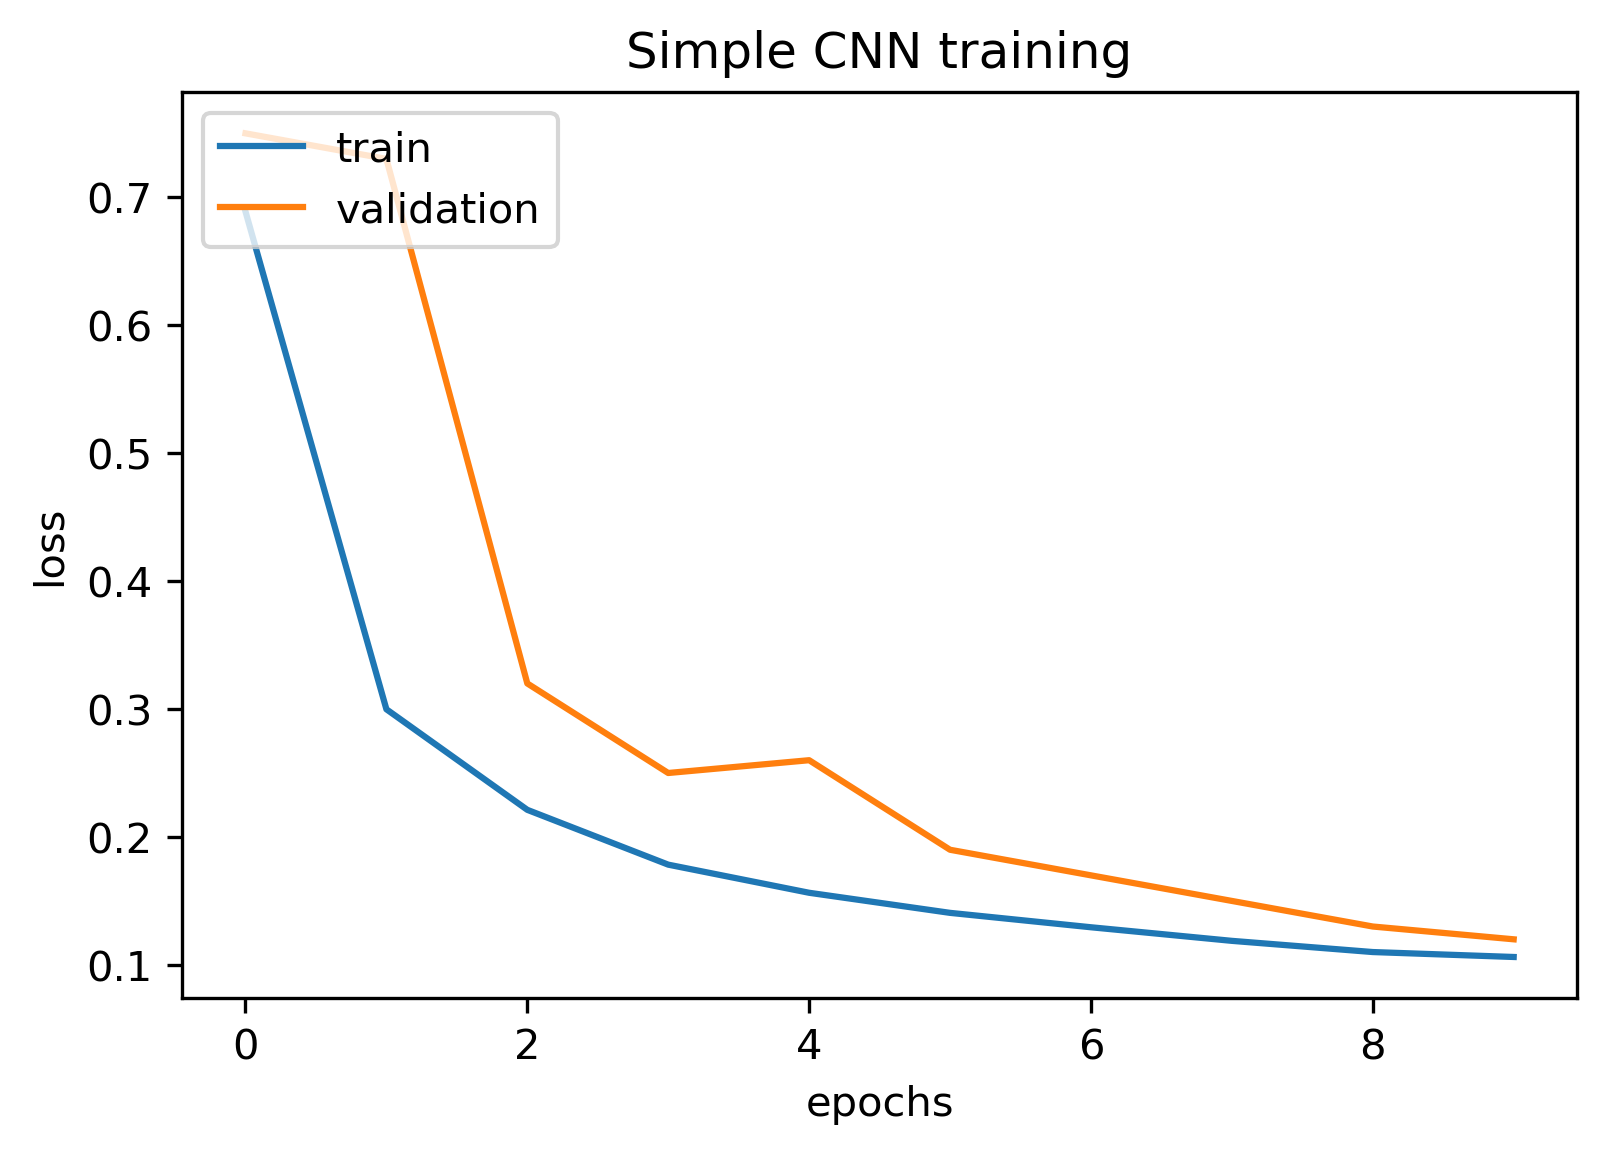

In [22]:
plt.figure(figsize=(6,4),dpi=300)
plt.plot(his.history['loss'])
plt.plot(val_loss)
plt.title('Simple CNN training')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('Simple CNN training Win7.pdf',bbox_inches='tight')
plt.show()


In [23]:
#vizualizacija modela
from keras.utils.vis_utils import plot_model

In [24]:
#!conda install pydot


In [25]:
plot_model(model, to_file='CNN model.pdf', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [26]:
#da vidimo nazive layera
#uzimamo output iz dense layer-a
print(model.layers[4].name)

dense


In [27]:
#preuzimanje outputa layera
layer_output=model.get_layer(model.layers[4].name).output

In [28]:
type(layer_output)

keras.engine.keras_tensor.KerasTensor

In [29]:
layer_output.name

'dense/Relu:0'

In [30]:
layer_output[0]

<KerasTensor: shape=(8,) dtype=float32 (created by layer 'tf.__operators__.getitem')>

In [31]:
intermediate_layer_model = keras.Model(inputs=model.input,
                                       outputs=model.get_layer(model.layers[4].name).output)

In [32]:
x_train_xg = intermediate_layer_model.predict(x_train)

346/346 [==============================] - 0s 920us/step


In [33]:
x_test_xg = intermediate_layer_model.predict(x_test)

149/149 [==============================] - 0s 904us/step


In [34]:
x_train_xg.shape

(11065, 8)

In [35]:
x_test_xg.shape

(4743, 8)

In [36]:
x_test_xgb_dataframe = pd.DataFrame(x_test_xg)

In [37]:
x_test_xgb_dataframe.to_csv('test_xgb.csv')

In [38]:
x_train_xg_dataframe = pd.DataFrame(x_train_xg)

In [39]:
x_train_xg_dataframe.to_csv('train_xgb.csv')

In [40]:
import xgboost

C:\Users\anaki\anaconda3\envs\ML\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [41]:
from xgboost import XGBClassifier

In [42]:
xgb_model = XGBClassifier()

In [43]:
y_train_xg = np.zeros(len(y_train))
for i in range(len(y_train)):
    y_train_xg[i] = np.argmax(y_train[i])

In [44]:
y_test_xg = np.zeros(len(y_test))
for i in range(len(y_test)):
    y_test_xg[i] = np.argmax(y_test[i])

In [45]:
y_test_xg

array([0., 0., 4., ..., 0., 0., 0.])

In [46]:
y_train_xg

array([0., 0., 0., ..., 0., 4., 0.])

In [47]:
#y_train_xg.shape

In [48]:
#y_train_xg = y_train_xg.reshape(len(x_train_xg),1)

In [49]:
#y_train_xg.shape

In [50]:
#x_train.shape

In [51]:
#y_test_xg = y_test_xg.reshape(len(x_test_xg),1)

In [52]:
xgb_model.fit(x_train_xg,y_train_xg)

C:\Users\anaki\anaconda3\envs\ML\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:29:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [70]:
preds = xgb_model.predict(x_test_xg)

In [54]:
preds

array([0., 0., 4., ..., 0., 0., 0.])

In [55]:
y_test_xg

array([0., 0., 4., ..., 0., 0., 0.])

In [56]:
total = len(y_test)
correct = 0 
for i in range(len(y_test_xg)):
    if preds[i] == y_test_xg[i]:
        correct = correct+1
    

In [57]:
acc = correct/total

In [58]:
acc

0.9839763862534261

In [59]:
preds = xgb_model.predict(x_train_xg)

In [60]:
total = len(y_train)
correct = 0 
for i in range(len(y_train_xg)):
    if preds[i] == y_train_xg[i]:
        correct = correct+1
    

In [61]:
acc = correct/total

In [62]:
acc

0.9990058743786715

In [63]:
from sklearn.metrics import classification_report

In [65]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [66]:
preds

array([0., 0., 0., ..., 0., 4., 0.])

In [67]:
y_train_xg

array([0., 0., 0., ..., 0., 4., 0.])

In [69]:
print(classification_report(y_train_xg,preds))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6918
         1.0       1.00      1.00      1.00      1488
         2.0       1.00      0.88      0.94        51
         3.0       1.00      1.00      1.00       691
         4.0       0.99      1.00      1.00      1228
         5.0       1.00      1.00      1.00         3
         6.0       1.00      0.99      1.00       528
         7.0       1.00      1.00      1.00       158

    accuracy                           1.00     11065
   macro avg       1.00      0.98      0.99     11065
weighted avg       1.00      1.00      1.00     11065



In [71]:
print(classification_report(y_test_xg,preds))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2966
         1.0       0.99      1.00      1.00       638
         2.0       0.88      0.64      0.74        22
         3.0       0.98      0.99      0.98       296
         4.0       0.98      0.97      0.98       526
         5.0       0.00      0.00      0.00         1
         6.0       0.98      0.99      0.98       227
         7.0       0.70      0.66      0.68        67

    accuracy                           0.98      4743
   macro avg       0.81      0.78      0.79      4743
weighted avg       0.98      0.98      0.98      4743

